In [2]:
#basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression    
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
df = pd.read_csv('data/DJIA_table.csv')
dfCombined = pd.read_csv('data/Combined_News_DJIA_Prices.csv')
dfCombined[['Date','Label','Close','Volume']][0:20]

,Date,Label,Close,Volume
0,08-08-2008,0,11734.32031,212830000
1,11-08-2008,1,11782.34961,183190000
2,12-08-2008,0,11642.46973,173590000
3,13-08-2008,0,11532.95996,182550000
4,14-08-2008,1,11615.92969,159790000
5,15-08-2008,1,11659.90039,215040000
6,18-08-2008,0,11479.38965,156290000
7,19-08-2008,0,11348.54981,171580000
8,20-08-2008,1,11417.42969,144880000
9,21-08-2008,1,11430.20996,130020000


In [11]:
closeVolArr = np.array(dfCombined[['Close','Volume']].values)
min_max_scaler = MinMaxScaler(feature_range=(0,1))
cv_arr = min_max_scaler.fit_transform(closeVolArr)
y_arr = np.array(dfCombined['Label'])

In [44]:
window=10
train_per=0.1
closeVoldf = dfCombined[['Close','Volume']].values
dataset_train = np.array(closeVoldf[:int(closeVoldf.shape[0]*train_per)])
dataset_test = np.array(closeVoldf[int(closeVoldf.shape[0]*train_per)-window:])
print(dataset_train.shape,type(dataset_train))
print(dataset_test.shape,type(dataset_test))

(198, 2) <class 'numpy.ndarray'>
(1801, 2) <class 'numpy.ndarray'>


In [75]:
def create_dataset(x_in, y_in, window=10 ):
    x = []
    y = []

    #print("x",x_in.shape,"y : ", y_in.shape[0])
    for i in range(window, x_in.shape[0]):
           x.append(x_in[i-window:i].flatten())
           y.append(y_in[i])  

    x = np.array(x)    
    y = np.array(y)    
    
    #print(x.shape, y.shape)
    return x,y

In [76]:
x,y = create_dataset(cv_arr,y_arr,5)
print(x.shape,y.shape)

(1984, 10) (1984,)


In [77]:
# Create a data-set with Date: Last 5 close prices, Last 5 Volume
# Also a Predicted Y label 

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [82]:
#train_percentages=[0.1,0.3,0.5,0.7,0.8]
#window_sizes = [1,3,5,10]

train_percentages=[0.1,0.2,0.3,0.5,0.6,0.8]
window_sizes = [5,10,15,20,25,30,35,40,45,50,55,57,60,63,65,70,75,80]
modelList = []
modelList.append(("LogisticReg",LogisticRegression(random_state=42)))
modelList.append(("RandomForestClassifier",RandomForestClassifier(random_state=42)))
modelList.append(("SVC",SVC(random_state=42)))
modelList.append(("DecisionTreeClassifier",DecisionTreeClassifier(random_state=42)))
ts_acc_best=-2.0
best=[]

results={}
closeVoldf = dfCombined[['Close','Volume']].values
y_arr = np.array(dfCombined['Label'])
for train_per in train_percentages:            
    for window in window_sizes:
        
        
        #print(dataset_train.shape)
        #print(dataset_test.shape)
        

        dataset_train = np.array(closeVoldf[:int(closeVoldf.shape[0]*train_per)])
        y_train = np.array(y_arr[:int(y_arr.shape[0]*train_per)])
        dataset_test = np.array(closeVoldf[int(closeVoldf.shape[0]*train_per)-window:])
        y_test = np.array(y_arr[int(y_arr.shape[0]*train_per)-window:])

        min_max_scaler = MinMaxScaler(feature_range=(0,1))
        dataset_train = min_max_scaler.fit_transform(dataset_train)
        dataset_test = min_max_scaler.transform(dataset_test)
        
        #print(dataset_train.shape,y_train.shape)
        #print(dataset_test.shape,y_test.shape)

        x_train, y_train = create_dataset(dataset_train,y_train,window)
        x_test, y_test   = create_dataset(dataset_test,y_test,window)
        
        data={}
        for name, classifier in modelList:
            print('Processing ',train_per,window,name)
            classifier.fit(x_train,y_train)

            ytr_pred = classifier.predict(x_train)
            yts_pred = classifier.predict(x_test)

            tr_acc = accuracy_score(y_train,ytr_pred)
            ts_acc= accuracy_score(y_test,yts_pred)
            data[name] = [tr_acc,ts_acc]
            if(ts_acc_best < ts_acc) :
                ts_acc_best = ts_acc
                best = [train_per,window,name]
            
        
        
#         reg = LinearRegression().fit(x_train, y_train)                
#         y_test_pred=reg.predict(x_test)            
#         zz_test_pred=[]
#         zz_test_pred.append(1)            
#         for i in range(1,y_test_pred.shape[0]):    
#             if y_test_pred[i] - y_test_pred[i-1] > 0 :
#                     zz_test_pred.append(1)
#             else:
#                     zz_test_pred.append(0)
#         zz_test_pred_arr    = np.array(zz_test_pred)

        
       
        
        if train_per in list(results.keys()):
                mapTrainingPer = results[train_per]
                mapTrainingPer.update({window:data})                    
        else:
            mapTrainingPer = {}
            mapTrainingPer.update({window:data})
            results.update({train_per:mapTrainingPer})   
            
            
for train_per in results.keys():
    for window in results[train_per].keys():
        data=results[train_per][window]
        print(train_per, window, "\n",data)
        print('========================')            
print("Best: ",best, "Accuracy ",ts_acc_best)        

Processing  0.1 5 LogisticReg
Processing  0.1 5 RandomForestClassifier
Processing  0.1 5 SVC
Processing  0.1 5 DecisionTreeClassifier
Processing  0.1 10 LogisticReg
Processing  0.1 10 RandomForestClassifier
Processing  0.1 10 SVC
Processing  0.1 10 DecisionTreeClassifier
Processing  0.1 15 LogisticReg
Processing  0.1 15 RandomForestClassifier
Processing  0.1 15 SVC
Processing  0.1 15 DecisionTreeClassifier
Processing  0.1 20 LogisticReg
Processing  0.1 20 RandomForestClassifier
Processing  0.1 20 SVC
Processing  0.1 20 DecisionTreeClassifier
Processing  0.1 25 LogisticReg
Processing  0.1 25 RandomForestClassifier
Processing  0.1 25 SVC
Processing  0.1 25 DecisionTreeClassifier
Processing  0.1 30 LogisticReg
Processing  0.1 30 RandomForestClassifier
Processing  0.1 30 SVC
Processing  0.1 30 DecisionTreeClassifier
Processing  0.1 35 LogisticReg
Processing  0.1 35 RandomForestClassifier
Processing  0.1 35 SVC
Processing  0.1 35 DecisionTreeClassifier
Processing  0.1 40 LogisticReg
Process

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.2 70 RandomForestClassifier
Processing  0.2 70 SVC
Processing  0.2 70 DecisionTreeClassifier
Processing  0.2 75 LogisticReg
Processing  0.2 75 RandomForestClassifier
Processing  0.2 75 SVC
Processing  0.2 75 DecisionTreeClassifier
Processing  0.2 80 LogisticReg


C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.2 80 RandomForestClassifier
Processing  0.2 80 SVC
Processing  0.2 80 DecisionTreeClassifier
Processing  0.3 5 LogisticReg
Processing  0.3 5 RandomForestClassifier
Processing  0.3 5 SVC
Processing  0.3 5 DecisionTreeClassifier
Processing  0.3 10 LogisticReg
Processing  0.3 10 RandomForestClassifier
Processing  0.3 10 SVC
Processing  0.3 10 DecisionTreeClassifier
Processing  0.3 15 LogisticReg
Processing  0.3 15 RandomForestClassifier
Processing  0.3 15 SVC
Processing  0.3 15 DecisionTreeClassifier
Processing  0.3 20 LogisticReg
Processing  0.3 20 RandomForestClassifier
Processing  0.3 20 SVC
Processing  0.3 20 DecisionTreeClassifier
Processing  0.3 25 LogisticReg
Processing  0.3 25 RandomForestClassifier
Processing  0.3 25 SVC
Processing  0.3 25 DecisionTreeClassifier
Processing  0.3 30 LogisticReg
Processing  0.3 30 RandomForestClassifier
Processing  0.3 30 SVC
Processing  0.3 30 DecisionTreeClassifier
Processing  0.3 35 LogisticReg
Processing  0.3 35 RandomForestClassif

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.3 60 SVC
Processing  0.3 60 DecisionTreeClassifier
Processing  0.3 63 LogisticReg
Processing  0.3 63 RandomForestClassifier


C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.3 63 SVC
Processing  0.3 63 DecisionTreeClassifier
Processing  0.3 65 LogisticReg
Processing  0.3 65 RandomForestClassifier


C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.3 65 SVC
Processing  0.3 65 DecisionTreeClassifier
Processing  0.3 70 LogisticReg
Processing  0.3 70 RandomForestClassifier


C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.3 70 SVC
Processing  0.3 70 DecisionTreeClassifier
Processing  0.3 75 LogisticReg
Processing  0.3 75 RandomForestClassifier


C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.3 75 SVC
Processing  0.3 75 DecisionTreeClassifier
Processing  0.3 80 LogisticReg
Processing  0.3 80 RandomForestClassifier


C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.3 80 SVC
Processing  0.3 80 DecisionTreeClassifier
Processing  0.5 5 LogisticReg
Processing  0.5 5 RandomForestClassifier
Processing  0.5 5 SVC
Processing  0.5 5 DecisionTreeClassifier
Processing  0.5 10 LogisticReg
Processing  0.5 10 RandomForestClassifier
Processing  0.5 10 SVC
Processing  0.5 10 DecisionTreeClassifier
Processing  0.5 15 LogisticReg
Processing  0.5 15 RandomForestClassifier
Processing  0.5 15 SVC
Processing  0.5 15 DecisionTreeClassifier
Processing  0.5 20 LogisticReg
Processing  0.5 20 RandomForestClassifier
Processing  0.5 20 SVC
Processing  0.5 20 DecisionTreeClassifier
Processing  0.5 25 LogisticReg
Processing  0.5 25 RandomForestClassifier
Processing  0.5 25 SVC
Processing  0.5 25 DecisionTreeClassifier
Processing  0.5 30 LogisticReg
Processing  0.5 30 RandomForestClassifier
Processing  0.5 30 SVC
Processing  0.5 30 DecisionTreeClassifier
Processing  0.5 35 LogisticReg
Processing  0.5 35 RandomForestClassifier
Processing  0.5 35 SVC
Processing  0.5

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.5 60 SVC
Processing  0.5 60 DecisionTreeClassifier
Processing  0.5 63 LogisticReg
Processing  0.5 63 RandomForestClassifier
Processing  0.5 63 SVC
Processing  0.5 63 DecisionTreeClassifier
Processing  0.5 65 LogisticReg
Processing  0.5 65 RandomForestClassifier
Processing  0.5 65 SVC
Processing  0.5 65 DecisionTreeClassifier
Processing  0.5 70 LogisticReg
Processing  0.5 70 RandomForestClassifier


C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.5 70 SVC
Processing  0.5 70 DecisionTreeClassifier
Processing  0.5 75 LogisticReg
Processing  0.5 75 RandomForestClassifier


C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.5 75 SVC
Processing  0.5 75 DecisionTreeClassifier
Processing  0.5 80 LogisticReg
Processing  0.5 80 RandomForestClassifier


C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.5 80 SVC
Processing  0.5 80 DecisionTreeClassifier
Processing  0.6 5 LogisticReg
Processing  0.6 5 RandomForestClassifier
Processing  0.6 5 SVC
Processing  0.6 5 DecisionTreeClassifier
Processing  0.6 10 LogisticReg
Processing  0.6 10 RandomForestClassifier
Processing  0.6 10 SVC
Processing  0.6 10 DecisionTreeClassifier
Processing  0.6 15 LogisticReg
Processing  0.6 15 RandomForestClassifier
Processing  0.6 15 SVC
Processing  0.6 15 DecisionTreeClassifier
Processing  0.6 20 LogisticReg
Processing  0.6 20 RandomForestClassifier
Processing  0.6 20 SVC
Processing  0.6 20 DecisionTreeClassifier
Processing  0.6 25 LogisticReg
Processing  0.6 25 RandomForestClassifier
Processing  0.6 25 SVC
Processing  0.6 25 DecisionTreeClassifier
Processing  0.6 30 LogisticReg
Processing  0.6 30 RandomForestClassifier
Processing  0.6 30 SVC
Processing  0.6 30 DecisionTreeClassifier
Processing  0.6 35 LogisticReg
Processing  0.6 35 RandomForestClassifier
Processing  0.6 35 SVC
Processing  0.6

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.6 57 RandomForestClassifier
Processing  0.6 57 SVC
Processing  0.6 57 DecisionTreeClassifier
Processing  0.6 60 LogisticReg
Processing  0.6 60 RandomForestClassifier


C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.6 60 SVC
Processing  0.6 60 DecisionTreeClassifier
Processing  0.6 63 LogisticReg


C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.6 63 RandomForestClassifier
Processing  0.6 63 SVC
Processing  0.6 63 DecisionTreeClassifier
Processing  0.6 65 LogisticReg
Processing  0.6 65 RandomForestClassifier
Processing  0.6 65 SVC
Processing  0.6 65 DecisionTreeClassifier
Processing  0.6 70 LogisticReg


C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.6 70 RandomForestClassifier
Processing  0.6 70 SVC
Processing  0.6 70 DecisionTreeClassifier
Processing  0.6 75 LogisticReg
Processing  0.6 75 RandomForestClassifier
Processing  0.6 75 SVC
Processing  0.6 75 DecisionTreeClassifier
Processing  0.6 80 LogisticReg


C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.6 80 RandomForestClassifier
Processing  0.6 80 SVC
Processing  0.6 80 DecisionTreeClassifier
Processing  0.8 5 LogisticReg
Processing  0.8 5 RandomForestClassifier
Processing  0.8 5 SVC
Processing  0.8 5 DecisionTreeClassifier
Processing  0.8 10 LogisticReg
Processing  0.8 10 RandomForestClassifier
Processing  0.8 10 SVC
Processing  0.8 10 DecisionTreeClassifier
Processing  0.8 15 LogisticReg
Processing  0.8 15 RandomForestClassifier
Processing  0.8 15 SVC
Processing  0.8 15 DecisionTreeClassifier
Processing  0.8 20 LogisticReg
Processing  0.8 20 RandomForestClassifier
Processing  0.8 20 SVC
Processing  0.8 20 DecisionTreeClassifier
Processing  0.8 25 LogisticReg
Processing  0.8 25 RandomForestClassifier
Processing  0.8 25 SVC
Processing  0.8 25 DecisionTreeClassifier
Processing  0.8 30 LogisticReg
Processing  0.8 30 RandomForestClassifier
Processing  0.8 30 SVC
Processing  0.8 30 DecisionTreeClassifier
Processing  0.8 35 LogisticReg
Processing  0.8 35 RandomForestClassif

C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.8 55 RandomForestClassifier
Processing  0.8 55 SVC
Processing  0.8 55 DecisionTreeClassifier
Processing  0.8 57 LogisticReg
Processing  0.8 57 RandomForestClassifier
Processing  0.8 57 SVC
Processing  0.8 57 DecisionTreeClassifier
Processing  0.8 60 LogisticReg
Processing  0.8 60 RandomForestClassifier
Processing  0.8 60 SVC
Processing  0.8 60 DecisionTreeClassifier
Processing  0.8 63 LogisticReg


C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.8 63 RandomForestClassifier
Processing  0.8 63 SVC
Processing  0.8 63 DecisionTreeClassifier
Processing  0.8 65 LogisticReg
Processing  0.8 65 RandomForestClassifier
Processing  0.8 65 SVC
Processing  0.8 65 DecisionTreeClassifier
Processing  0.8 70 LogisticReg
Processing  0.8 70 RandomForestClassifier
Processing  0.8 70 SVC
Processing  0.8 70 DecisionTreeClassifier
Processing  0.8 75 LogisticReg
Processing  0.8 75 RandomForestClassifier


C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.8 75 SVC
Processing  0.8 75 DecisionTreeClassifier
Processing  0.8 80 LogisticReg
Processing  0.8 80 RandomForestClassifier


C:\Users\anagh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing  0.8 80 SVC
Processing  0.8 80 DecisionTreeClassifier
0.1 5 
 {'LogisticReg': [0.533678756476684, 0.4567280848687884], 'RandomForestClassifier': [1.0, 0.48408710217755446], 'SVC': [0.6528497409326425, 0.5170295924064768], 'DecisionTreeClassifier': [1.0, 0.4824120603015075]}
0.1 10 
 {'LogisticReg': [0.6170212765957447, 0.45616973757677276], 'RandomForestClassifier': [1.0, 0.46901172529313234], 'SVC': [0.6382978723404256, 0.5164712451144612], 'DecisionTreeClassifier': [1.0, 0.4935790061418202]}
0.1 15 
 {'LogisticReg': [0.6174863387978142, 0.45784477945281965], 'RandomForestClassifier': [1.0, 0.5025125628140703], 'SVC': [0.6174863387978142, 0.4567280848687884], 'DecisionTreeClassifier': [1.0, 0.45784477945281965]}
0.1 20 
 {'LogisticReg': [0.6460674157303371, 0.45896147403685095], 'RandomForestClassifier': [1.0, 0.5058626465661642], 'SVC': [0.6573033707865169, 0.46901172529313234], 'DecisionTreeClassifier': [1.0, 0.5086543830262423]}
0.1 25 
 {'LogisticReg': [0.64739884393063

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
output_size=1
window_size=10
x_train, y_train, z_train = create_dataset(dataset_train, window=window_size, op_size=output_size)
x_test, y_test, z_test = create_dataset(dataset_test, window=window_size, op_size=output_size)

#building the model
model = Sequential()
model.add(Dense(window_size, activation='relu', input_shape=(window_size,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
#model.add(Dense(10, activation='relu'))
#model.add(Dense(output_size))
model.add(Dense(output_size, activation='sigmoid'))
#model.add(Dense(window_size, activation='relu', input_shape=(window_size,)))
#model.add(Dense(30, activation='relu'))
#model.add(Dense(output_size, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error')
#training the model
#history = model.fit(x_train, y_train, epochs=50, batch_size = 2)
history = model.fit(x_train, y_train, validation_split=0.15, epochs=200, batch_size=2, verbose=0,shuffle=False)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________
None


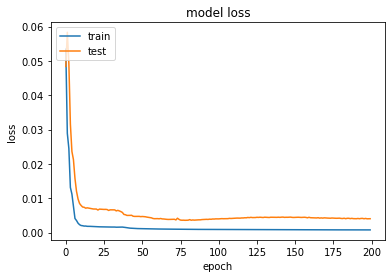

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()